In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Advanced_Data_Augmentation"
!pwd

/content/drive/MyDrive/Advanced_Data_Augmentation
/content/drive/MyDrive/Advanced_Data_Augmentation


In [3]:
!ls

data	    models	 results	  test_augmentation  Untitled3.ipynb
Helpers.py  __pycache__  Solai_Nature.py  train.ipynb	     utils.py


In [3]:
import models
from utils import progress_bar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm

import Solai_Nature as sn
import Helpers as hp
from PIL import Image

In [4]:
#!/usr/bin/env python3 -u
# Copyright (c) 2017-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the LICENSE file in
# the root directory of this source tree.
from __future__ import print_function

import argparse
import csv
import os

import numpy as np
import torch
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import cv2 as cv2

#import sys  
#sys.path.insert(0, '/content/gdrive/MyDrive/Advanced_Data_Augmentation')




# parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
# parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
# parser.add_argument('--resume', '-r', action='store_true',
#                     help='resume from checkpoint')
# parser.add_argument('--model', default="ResNet18", type=str,
#                     help='model type (default: ResNet18)')
# parser.add_argument('--name', default='0', type=str, help='name of run')
# parser.add_argument('--seed', default=0, type=int, help='random seed')
# parser.add_argument('--batch-size', default=128, type=int, help='batch size')
# parser.add_argument('--epoch', default=200, type=int,
#                     help='total epochs to run')
# parser.add_argument('--no-augment', dest='augment', action='store_false',
#                     help='use standard augmentation (default: True)')
# parser.add_argument('--decay', default=1e-4, type=float, help='weight decay')
# parser.add_argument('--alpha', default=1., type=float,
#                     help='mixup interpolation coefficient (default: 1)')
# args = parser.parse_args()

params = {
    "lr": .01,
    "resume": False,
    "model": "ResNet18",
    "name": "mixup-128-NormalAdvsTrain",
    "seed": 10,
    "batch_size": 128,
    "decay": 5e-4, 
    "augment": True,
    "epoch": 1,
#     "no_augment": False,
    "alpha": 0.,
}

# %cd ../../

In [5]:
use_cuda = torch.cuda.is_available()

best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

if params["seed"] != 0:
    torch.manual_seed(params["seed"])

# Data
print('==> Preparing data..')
if params["augment"]:
    transform_train = transforms.Compose([
        #transforms.RandomCrop(32, padding=4),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2023, 0.1994, 0.2010)),
    ])
else:
    print("no augmentation")
    transform_train = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2023, 0.1994, 0.2010)),
    ])


transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = datasets.CIFAR10(root='./data', train=True, download=False,
                            transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=params["batch_size"],
                                          shuffle=True, num_workers=8)

testset = datasets.CIFAR10(root='./data', train=False, download=False,
                           transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=8)

==> Preparing data..


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
!pip install cifar2png

(32, 32, 3)
2.734221


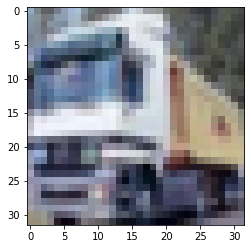

In [8]:
#print(trainset[1][0].shape)
#plt.imshow(trainset[1][0].permute(1,2,0))
#image=trainset[1][0].numpy()
#image=np.transpose(image, (1, 2, 0))
#print(image.shape)
#plt.imshow(image)
#bright_images= sn.brighten(image) ## if brightness_coeff is undefined brightness is random in each image
#hp.visualize(bright_images)
#plt.imshow(bright_images)
#plt.imshow(  tensor_image.permute(1, 2, 0)  )
#trainset[0][0].permute(1, 2, 0)
#type(trainset)
#for (image,target) in trainloader:
  #print(image.permute(0,2,3,1))
  #plt.imshow(image.permute(0,2,3,1))

array = trainset[1][0].numpy().transpose(1,2,0)
print(array.shape)
    # array is RGB. cv2 needs BGR
# array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
print(array.reshape(-1).max())
# plt.imshow(array)
# plt.show()
a_min=array.reshape(-1).min()
a_max=array.reshape(-1).max()
a_shape=array.shape
# print(array,'-',a_min,'/',(a_max-a_min))
a=((array.reshape(-1)-a_min)/(a_max-a_min))*255
a=a.reshape(a_shape)
b=a.astype('uint8')
plt.imshow(b)
plt.show()

In [9]:
import importlib
import Solai_Nature #import the module here, so that it can be reloaded.
importlib.reload(Solai_Nature)

<module 'Solai_Nature' from '/content/drive/My Drive/Advanced_Data_Augmentation/Solai_Nature.py'>

In [10]:
#cv2.cvtColor(array,cv2.COLOR_BGR2RGB)

[[[ 58 124 174]
  [ 59 125 175]
  [ 59 125 175]
  ...
  [ 49 121  99]
  [ 49 121  99]
  [ 49 121  99]]]
(720, 1280, 3)


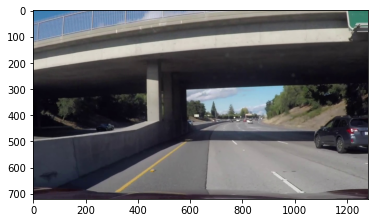

In [11]:
path='./test_augmentation/*.jpg'
images= hp.load_images(path)
# hp.visualize(images[0:3], column=3, fig_size=(20,10))
print(images[0][0:1])
plt.imshow(images[0])
print(images[0].shape)

In [12]:
#print(type(images[0][1][1][1]))

In [13]:
#plt.imshow(b)
#plt.show()
#print(images[0].shape)
#print(b.shape)
#print(a.shape)

#snowy_images= sn.add_snow(b)
#plt.imshow(snowy_images)

In [198]:
img_arr=trainset[11][0].numpy()
img_arr=np.transpose(img_arr, (1, 2, 0))
a_min=img_arr.reshape(-1).min()
a_max=img_arr.reshape(-1).max()
a_shape=img_arr.shape
a=((img_arr.reshape(-1)-a_min)/(a_max-a_min))*255
a=a.reshape(a_shape)
b=a.astype('uint8')

(32, 32, 3)
(32, 32, 3)


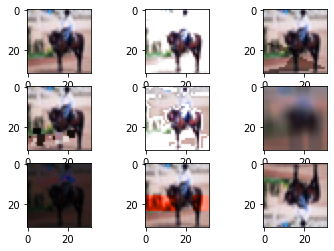

In [207]:
aug_images= sn.augment_random(b, aug_types=['random_brightness','add_shadow','add_gravel','add_snow','add_rain','random_brightness','add_autumn','random_flip'], volume='expand')  ##all aug_types are applied in both images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(b)
axarr[0,1].imshow(aug_images[0])
axarr[0,2].imshow(aug_images[1])
axarr[1,0].imshow(aug_images[2])
axarr[1,1].imshow(aug_images[3])
axarr[1,2].imshow(aug_images[4])
axarr[2,0].imshow(aug_images[5])
axarr[2,1].imshow(aug_images[6])
axarr[2,2].imshow(aug_images[7])


In [168]:
def augment_surrounding(inputs,targets):
  image_list=[]
  label_list=[]
  for i in range(inputs.shape[0]):  
    img_arr=inputs[i].numpy()
    img_arr=np.transpose(img_arr, (1, 2, 0))
    a_min=img_arr.reshape(-1).min()
    a_max=img_arr.reshape(-1).max()
    a_shape=img_arr.shape
    a=((img_arr.reshape(-1)-a_min)/(a_max-a_min))*255
    a=a.reshape(a_shape)
    b=a.astype('uint8')
    image_list.append(img_arr)
    label_list.append(trainset[i][1])
    aug_images= sn.augment_random(b, aug_types=['random_brightness','add_shadow','add_gravel','add_snow','add_rain','add_autumn','random_flip'], volume='expand')
    for aug_img in aug_images:
      temp_a=((aug_img.reshape(-1)/255)*(a_max-a_min))+a_min
      temp_a=temp_a.reshape(a_shape)
      new_aug_img=temp_a.astype('float32')
      image_list.append(new_aug_img)
      label_list.append(trainset[i][1])
  aug_image_list= [ torch.from_numpy(np.transpose(ele, (2, 0, 1))).float() for ele in image_list ]
  aug_inputs=torch.stack(aug_image_list)
  aug_targets= torch.LongTensor(label_list)
  
  return aug_inputs, aug_targets

In [169]:
for batch_idx, (inputs, targets) in enumerate(trainloader):
  if batch_idx==0:
    aug_inputs,aug_targets=augment_surrounding(inputs,targets)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

In [128]:
torch_image_list= [ torch.from_numpy(np.transpose(ele, (2, 0, 1))).float() for ele in image_list ]
aug_batch=list(zip(torch_image_list, label_list))
print(aug_batch[0])

(tensor([[[-0.2967, -0.8783, -0.8589,  ..., -1.1497, -1.0527, -1.2272],
         [-0.8007, -0.8201, -0.1998,  ..., -1.1109, -1.0334, -1.1109],
         [-0.2580, -0.1416,  0.3236,  ..., -1.2272, -1.0527, -1.2854],
         ...,
         [ 0.6919,  0.9439,  0.1879,  ...,  0.3042, -0.8007, -0.9558],
         [ 0.4787,  0.3817, -0.2773,  ...,  0.4787, -0.2967, -0.9170],
         [-0.0835,  0.0134, -0.6844,  ...,  0.1879, -0.0447, -0.4906]],

        [[ 0.1188, -0.7466, -0.8646,  ..., -1.1202, -0.9629, -1.2382],
         [-0.5892, -0.7072, -0.0386,  ..., -1.1202, -1.0022, -1.1792],
         [-0.1172, -0.0386,  0.5121,  ..., -1.2972, -1.1006, -1.4152],
         ...,
         [ 0.3548,  0.5711, -0.1172,  ...,  0.1188, -0.8646, -0.9236],
         [ 0.1778,  0.1384, -0.3532,  ...,  0.3548, -0.3139, -0.8842],
         [-0.6679, -0.4122, -0.7859,  ...,  0.1778, -0.0189, -0.4516]],

        [[ 0.0223, -0.3679, -0.4850,  ..., -0.6020, -0.3679, -0.6411],
         [-0.4460, -0.3289,  0.1198,  ..., -

In [112]:
print(len(image_list))

896


In [15]:
image_list=[]
label_list=[]

for i in range(len(trainset)):
        img_arr=trainset[i][0].numpy()
        img_arr=np.transpose(img_arr, (1, 2, 0))
        a_min=img_arr.reshape(-1).min()
        a_max=img_arr.reshape(-1).max()
        a_shape=img_arr.shape
        a=((img_arr.reshape(-1)-a_min)/(a_max-a_min))*255
        a=a.reshape(a_shape)
        #print(type(a))
        b=a.astype('uint8')
        #img_arr_temp=img_arr.astype('uint8')
        #image_list.append(img_arr_)
        #label_list.append(trainset[i][1])
        image_list.append(b)
        label_list.append(trainset[i][1])
        aug_images= sn.augment_random(b, aug_types=['random_brightness','add_shadow','add_gravel','add_snow','add_rain','add_autumn','random_flip'], volume='expand')
        for aug_img in aug_images:
          image_list.append(aug_img)
          label_list.append(trainset[i][1])


Streaming output truncated to the last 5000 lines.
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(

In [16]:
#aug_images= sn.augment_random(b, aug_types=['random_brightness','add_shadow','add_gravel','add_snow','add_rain','add_autumn','random_flip'], volume='expand')  ##all aug_types are applied in both images
#print(aug_images[0].shape)
#for i,img in enumerate(aug_images):
#  print(i)
#image_list[27].shape
#plt.imshow(image_list[27])

6


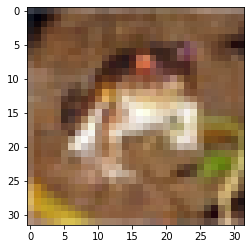

6


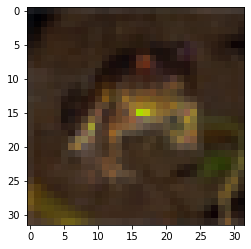

6


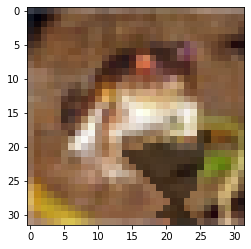

6


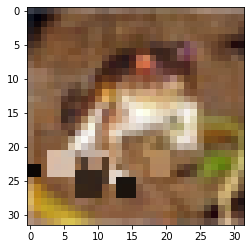

6


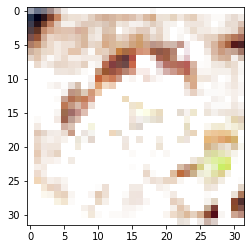

6


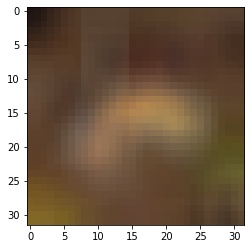

6


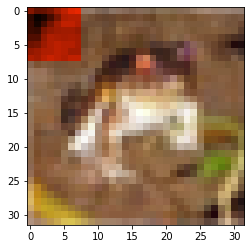

6


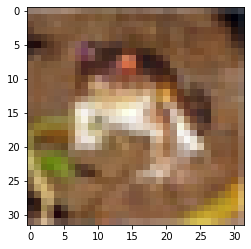

9


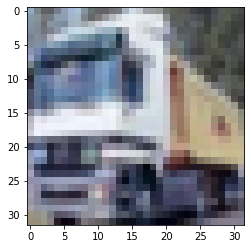

9


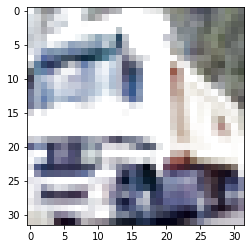

9


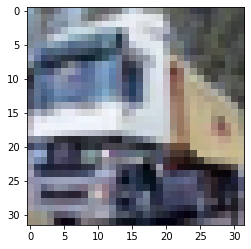

In [17]:
plt.imshow(image_list[0])
print(label_list[0])
plt.show()
plt.imshow(image_list[1])
print(label_list[1])
plt.show()
plt.imshow(image_list[2])
print(label_list[2])
plt.show()
plt.imshow(image_list[3])
print(label_list[3])
plt.show()
plt.imshow(image_list[4])
print(label_list[4])
plt.show()
plt.imshow(image_list[5])
print(label_list[5])
plt.show()
plt.imshow(image_list[6])
print(label_list[6])
plt.show()
plt.imshow(image_list[7])
print(label_list[7])
plt.show()
plt.imshow(image_list[8])
print(label_list[8])
plt.show()
plt.imshow(image_list[9])
print(label_list[9])
plt.show()
plt.imshow(image_list[10])
print(label_list[10])
plt.show()

In [18]:
print(type(trainset[0]))

<class 'tuple'>


In [19]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [20]:
#new_image_set = [torch.from_numpy(item).float() for item in image_list]
new_image_set = [torch.from_numpy(item).to(dtype=torch.float) for item in image_list]

In [21]:
print(new_image_set[0].type())

torch.FloatTensor


In [22]:
print(type(new_image_set))

<class 'list'>


In [23]:
print(type(trainset[0]))

<class 'tuple'>


In [24]:

#x_np = torch.from_numpy()
print(trainset[0][0].shape)
print(image_list[0].shape)
torch_image_list=[]
for ele in image_list:
  ele=np.transpose(ele, (2, 0, 1))
  torch_image_list.append(torch.from_numpy(ele).to(dtype=torch.float))
  #torch_image_list.append(torch.from_numpy(ele).float())

torch.Size([3, 32, 32])
(32, 32, 3)


In [25]:
print(torch_image_list[0].shape)
new_trainset=list(zip(torch_image_list, label_list))
#new_trainset=[]
#for ele in temp_trainset:
print(new_trainset[0][0].float().type())
#a=new_trainset[1][0].float()
#print(a.type())
print(new_trainset[1][0].type())

torch.Size([3, 32, 32])
torch.FloatTensor
torch.FloatTensor


In [30]:
trainloader = torch.utils.data.DataLoader(new_trainset,
                                          batch_size=params["batch_size"],
                                          shuffle=True, num_workers=16)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [31]:
# Model
if params["resume"]:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.t7' + params["name"] + '_'
                            + str(params["seed"]), map_location='cpu')
    
    net = checkpoint['net']
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch'] + 1
    rng_state = checkpoint['rng_state']
    torch.set_rng_state(rng_state)
else:
    print('==> Building model..')
    net = models.__dict__[params["model"]]()

if not os.path.isdir('results'):
    os.mkdir('results')
logname = ('results/log_' + net.__class__.__name__ + '_' + params["name"] + '_'
           + str(params["seed"]) + '.csv')

if use_cuda:
    net = torch.nn.DataParallel(net)
    net.to(f'cuda:{net.device_ids[0]}')
    print(torch.cuda.device_count())
    cudnn.benchmark = True
    print('Using CUDA..')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=params["lr"], momentum=0.9,
                      weight_decay=params["decay"])

==> Building model..


In [33]:
if not os.path.exists(logname):
    with open(logname, 'w') as logfile:
        logwriter = csv.writer(logfile, delimiter=',')
        logwriter.writerow(['epoch', 'train loss', 'reg loss', 'train acc',
                            'test loss', 'test acc'])

for epoch in range(start_epoch, params["epoch"]):
    train_loss, reg_loss, train_acc = train_normal(epoch, advs_train=True)
    test_loss, test_acc = test(epoch)
    adjust_learning_rate(optimizer, epoch)
    with open(logname, 'a') as logfile:
        logwriter = csv.writer(logfile, delimiter=',')
        logwriter.writerow([epoch, train_loss, reg_loss, train_acc, test_loss,
                            test_acc])


Epoch: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored